!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost
!pip install wordcloud
!python -m spacy download en_core_web_sm
!pip install lightgbm

!pip install --upgrade textract

In [1]:
import os,re
import docx2txt
import textract
from PyPDF2 import PdfReader
import win32com.client
import pandas as pd
import numpy as np
from docx import Document
import nltk
nltk.download('punkt')
nltk.download("stopwords")
import matplotlib.pyplot as plt
#%matplotlibinline
import seaborn as sns
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
#from sklearn import metrics
#from sklearn.metrics import accuracy_score,precision_score
#from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
os.listdir(r'C:\Users\harsh\Downloads\Resume_Classification_NLP\Resumes')

['Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'Peoplesoft resumes',
 'React Developer_Deepakreddy.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_PavasGoswami.doc',
 'React Developer_PavasGoswami.docx',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Vinay Reddy.doc',
 'React Developer_Vinay Reddy.docx',
 'React Dev_Krishna Kanth.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_AnjaniPriyadarshini.docx',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs D

In [3]:
file_path = []
category = []
directory = r'C:\Users\harsh\Downloads\Resume_Classification_NLP\Resumes'

for i in os.listdir(directory):
    if i.endswith('.doc') or i.endswith('.docx') or i.endswith('.pdf'):
        full_path = os.path.join(directory, i)
        if i.endswith('.doc'):
            # Convert DOC file to DOCX format using pywin32
            word = win32com.client.Dispatch('Word.Application')
            doc = word.Documents.Open(full_path)
            new_path = os.path.splitext(full_path)[0] + '.docx'
            doc.SaveAs(new_path, 12)  # 12 means DOCX format
            doc.Close()
            word.Quit()
            full_path = new_path
        elif i.endswith('.pdf'):
            # Extract text from PDF file using PyPDF2
            with open(full_path, 'rb') as f:
                pdf = PdfReader(f)
                text = ''
                for page in pdf.pages:
                    text += page.extract_text()
        else:
            # Extract text from the file using textract
            text = textract.process(full_path).decode('utf-8')
        file_path.append(text)
        category.append('React JS Developer Resume')

In [4]:
file_path, category

(['Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n\n Karnataka State Board of Technical Examination, \n\nBengaluru \n\n \n\n60% \n\n \n\n \n\n             2017 \n\n \n\n      

In [5]:
file_path_1 = []
category_1 = []
directory_1= r'C:\Users\harsh\Downloads\Resume_Classification_NLP\Resumes\Peoplesoft resumes'

for i in os.listdir(directory_1):
    if i.endswith('.doc') or i.endswith('.docx') or i.endswith('.pdf'):
        full_path = os.path.join(directory_1, i)
        if i.endswith('.doc'):
            # Convert DOC file to DOCX format using pywin32
            word = win32com.client.Dispatch('Word.Application')
            doc = word.Documents.Open(full_path)
            new_path = os.path.splitext(full_path)[0] + '.docx'
            doc.SaveAs(new_path, 12)  # 12 means DOCX format
            doc.Close()
            word.Quit()
            full_path = new_path
        elif i.endswith('.pdf'):
            # Extract text from PDF file using PyPDF2
            with open(full_path, 'rb') as f:
                pdf = PdfReader(f)
                text = ''
                for page in pdf.pages:
                    text += page.extract_text()
        else:
            # Extract text from the file using textract
            text = textract.process(full_path).decode('utf-8')
        file_path_1.append(text)
        category_1.append('PeopleSoft Resume')


In [6]:
file_path_1, category_1

(['Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nMan

In [7]:
file_path_2 = []
category_2 = []
directory_2= r'C:\Users\harsh\Downloads\Resume_Classification_NLP\Resumes\SQL Developer Lightning insight'

for i in os.listdir(directory_2):
    if i.endswith('.doc') or i.endswith('.docx') or i.endswith('.pdf'):
        full_path = os.path.join(directory_2, i)
        if i.endswith('.doc'):
            # Convert DOC file to DOCX format using pywin32
            word = win32com.client.Dispatch('Word.Application')
            doc = word.Documents.Open(full_path)
            new_path = os.path.splitext(full_path)[0] + '.docx'
            doc.SaveAs(new_path, 12)  # 12 means DOCX format
            doc.Close()
            word.Quit()
            full_path = new_path
        elif i.endswith('.pdf'):
            # Extract text from PDF file using PyPDF2
            with open(full_path, 'rb') as f:
                pdf = PdfReader(f)
                text = ''
                for page in pdf.pages:
                    text += page.extract_text()
        else:
            # Extract text from the file using textract
            text = textract.process(full_path).decode('utf-8')
        file_path_2.append(text)
        category_2.append('SQL Developer Lightning Insight Resume')


In [8]:
file_path_2, category_2

(['ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Developer   \n\n\n\n\t\t\n\n\n\nSummary\n\n\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\n\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\n\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\n\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\n\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\n\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\n\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\n\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\n\nUsed 

In [9]:
file_path_3 = []
category_3 = []
directory_3= r'C:\Users\harsh\Downloads\Resume_Classification_NLP\Resumes\workday resumes'

for i in os.listdir(directory_3):
    if i.endswith('.doc') or i.endswith('.docx') or i.endswith('.pdf'):
        full_path = os.path.join(directory_3, i)
        if i.endswith('.doc'):
            # Convert DOC file to DOCX format using pywin32
            word = win32com.client.Dispatch('Word.Application')
            doc = word.Documents.Open(full_path)
            new_path = os.path.splitext(full_path)[0] + '.docx'
            doc.SaveAs(new_path, 12)  # 12 means DOCX format
            doc.Close()
            word.Quit()
            full_path = new_path
        elif i.endswith('.pdf'):
            # Extract text from PDF file using PyPDF2
            with open(full_path, 'rb') as f:
                pdf = PdfReader(f)
                text = ''
                for page in pdf.pages:
                    text += page.extract_text()
        else:
            # Extract text from the file using textract
            text = textract.process(full_path).decode('utf-8')
        file_path_3.append(text)
        category_3.append('Workday Resume')


In [10]:
file_path_3, category_3

(['Chinna Subbarayudu M\n\nDOB: 06th March 1994\n\nNationality: Indian\n\n\t\t\n\n\t\t\tPROFILE SUMMARY:\n\n\n\n\n\n\n\nHaving around 5.1 years of IT experience in developing and Implementation of ERP technology by using Workday HCM and ETL (informatica) technologies.\n\n3.6 years of experience as Workday Integration Consultant and involved in a maintenance and implementation.\n\nExperience in all phases in Workday like requirements gathering, Analysis, Design, Development and Testing.\n\nHands on experience in inbound/ outbound integrations using core connector, Workday studio, managing business processes, working with EIB, report writer.\n\nDeveloped and maintained custom-report types (Advanced, Matrix, Composite) using report writer tool.\n\nInvolved in transformation of XML into XSLT for presenting data for different web Services.\n\nBuilding Workday Integration (EIB), calculated fields, Custom Reports and Writing XSLT transformation code.\n\nDeveloped testing\xa0strategies and val

In [11]:
data = pd.DataFrame(data = file_path , columns = ['Resumes'])

In [12]:
data['category'] = category
data.head()

,Resumes,category
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume


In [13]:
data_1 = pd.DataFrame(data = file_path_1 , columns = ['Resumes'])
data_1['category_1'] = category_1
data_1.head()

,Resumes,category_1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Resume
1,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Resume
2,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft Resume
3,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft Resume
4,PeopleSoft Database Administrator\n\n ...,PeopleSoft Resume


In [14]:
data_2 = pd.DataFrame(data = file_path_2 , columns = ['Resumes'])
data_2['category_2'] = category_2
data_2.head()

,Resumes,category_2
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning Insight Resume
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning Insight Resume
2,BUDDHA VAMSI ...,SQL Developer Lightning Insight Resume
3,KAMBALLA PRADEEP ...,SQL Developer Lightning Insight Resume
4,KAMBALLA PRADEEP ...,SQL Developer Lightning Insight Resume


In [15]:
data_3 = pd.DataFrame(data = file_path_3 , columns = ['Resumes'])
data_3['category_3'] = category_3
data_3.head()

,Resumes,category_3
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resume
2,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resume
3,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Workday Resume
4,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Workday Resume


In [16]:
df = data.append([data_1, data_2, data_3], ignore_index = True)

In [17]:
df

,Resumes,category,category_1,category_2,category_3
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,NaN,NaN,NaN
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
100,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday Resume
101,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday Resume
102,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday Resume
103,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday Resume


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resumes     105 non-null    object
 1   category    27 non-null     object
 2   category_1  30 non-null     object
 3   category_2  17 non-null     object
 4   category_3  31 non-null     object
dtypes: object(5)
memory usage: 4.2+ KB


In [19]:
df['Category'] = category + category_1 + category_2 + category_3
df

,Resumes,category,category_1,category_2,category_3,Category
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
100,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday Resume,Workday Resume
101,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday Resume,Workday Resume
102,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday Resume,Workday Resume
103,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday Resume,Workday Resume


In [20]:
df.drop(['category', 'category_1', 'category_2', 'category_3'], axis = 1, inplace = True)

In [21]:
df

,Resumes,Category
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
...,...,...
100,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume
101,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
102,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
103,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,Workday Resume


In [22]:
df.isna().count()

Resumes     105
Category    105
dtype: int64

In [23]:
df.duplicated().sum()

26

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.head()

,Resumes,Category
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume


In [26]:
df.shape

(79, 2)

In [27]:
def preprocess(txt):
    txt = txt.lower()                                                             # convert all characters in the string to lower case
    txt = re.sub('[^a-zA-Z]', ' ', txt)                                           # remove non-english characters, punctuation and numbers
    txt = re.sub('http\S+\s*', ' ', txt)                                          # remove URLs
    txt = re.sub('RT|cc', ' ', txt)                                               # remove RT and cc
    txt = re.sub('#\S+', '', txt)                                                 # remove hashtags
    txt = re.sub('@\S+', '  ', txt)                                               # remove mentions
    txt = re.sub('\s+', ' ', txt)                                                 # remove extra whitespace
    txt = nltk.tokenize.word_tokenize(txt)                                        # tokenize word
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]     # remove stop words
    return ' '.join(txt)                                                          # stemming

In [28]:
df['Resumes'] = df['Resumes'].apply(lambda w: preprocess(w))

In [29]:
df.head()

,Resumes,Category
0,name ravali p curriculum vitae specialization ...,React JS Developer Resume
1,susovan bag seeking challenging position field...,React JS Developer Resume
2,kanumuru deepak reddy career objective secure ...,React JS Developer Resume
3,haripriya battina experience ui developer reac...,React JS Developer Resume
4,kamalakar reddy linked www linkedin com kamala...,React JS Developer Resume


In [30]:
df.shape

(79, 2)

In [31]:
import os
os.chdir(r'C:\Users\harsh\Downloads\Resume_Classification_NLP')

In [32]:
df.to_csv('Resume.csv', index=False)

## Exploratory Data Analysis

In [33]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 143), ('role', 142), ('developer', 139), ('environment', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('studio', 128), ('core', 128), ('work', 124), ('custom', 124), ('js', 123

In [34]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


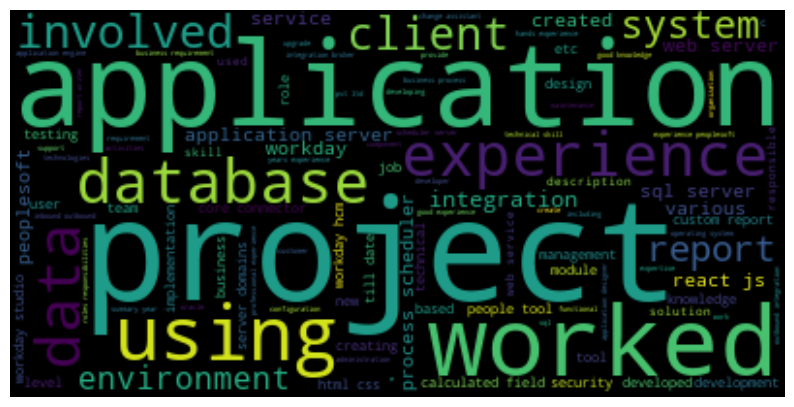

In [35]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
categories = np.sort(df['Category'].unique())
categories

array(['PeopleSoft Resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [37]:
df_categories = [df[df['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
df_categories

[                                              Resumes           Category
 27  anubhav kumar singh core competencies scriptin...  PeopleSoft Resume
 29  g ananda rayudu www linkedin com anandgudapati...  PeopleSoft Resume
 31  peoplesoft database administrator gangareddy p...  PeopleSoft Resume
 32  classification internal classification interna...  PeopleSoft Resume
 34  priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft Resume
 35  sirazuddin bangalore india sirazuddin bangalor...  PeopleSoft Resume
 37  peoplesoft administrator srinivas k experience...  PeopleSoft Resume
 38  peoplesoft admin varkala vikas career objectiv...  PeopleSoft Resume
 40  vinod akkala peoplesoft dba admin professional...  PeopleSoft Resume
 42  peoplesoft admin peoplesoft dba ganesh alladi ...  PeopleSoft Resume
 43  peoplesoft administration vivekanand sayana ca...  PeopleSoft Resume
 45  arun venu experience summary experience years ...  PeopleSoft Resume
 47  personal details name pritam bisw

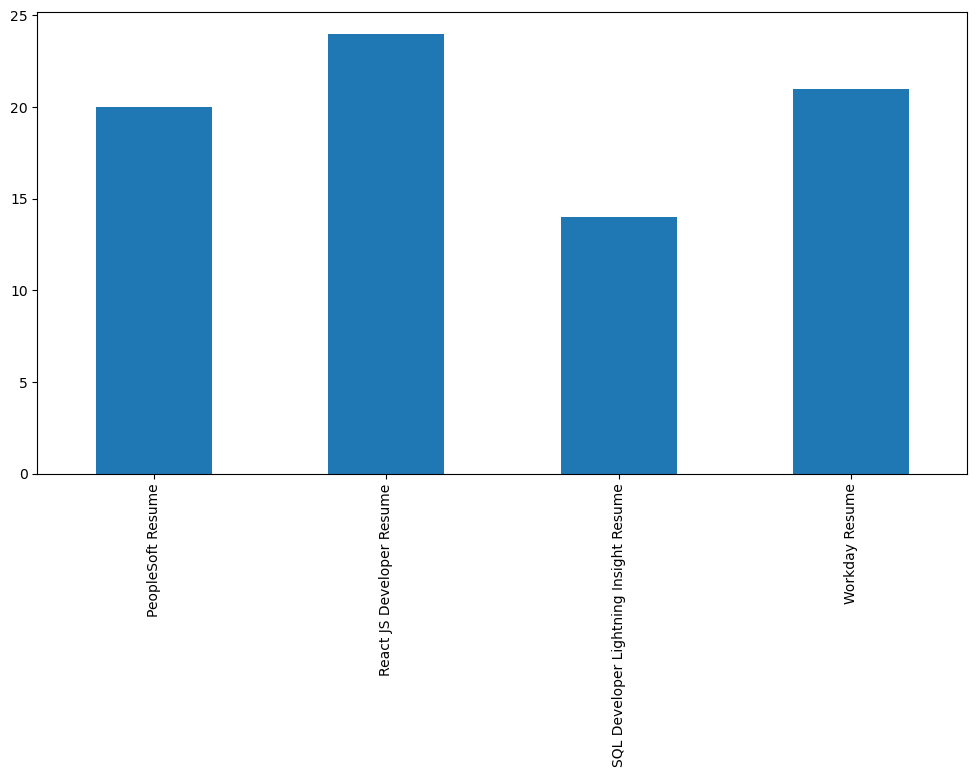

In [38]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [39]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [40]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

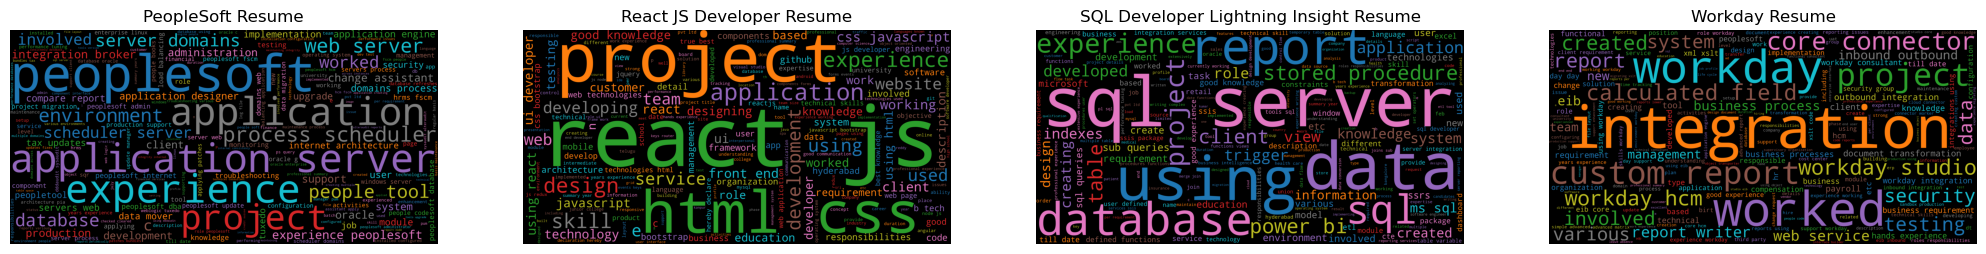

In [41]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [42]:
def wordfreq(df):
    count = df['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

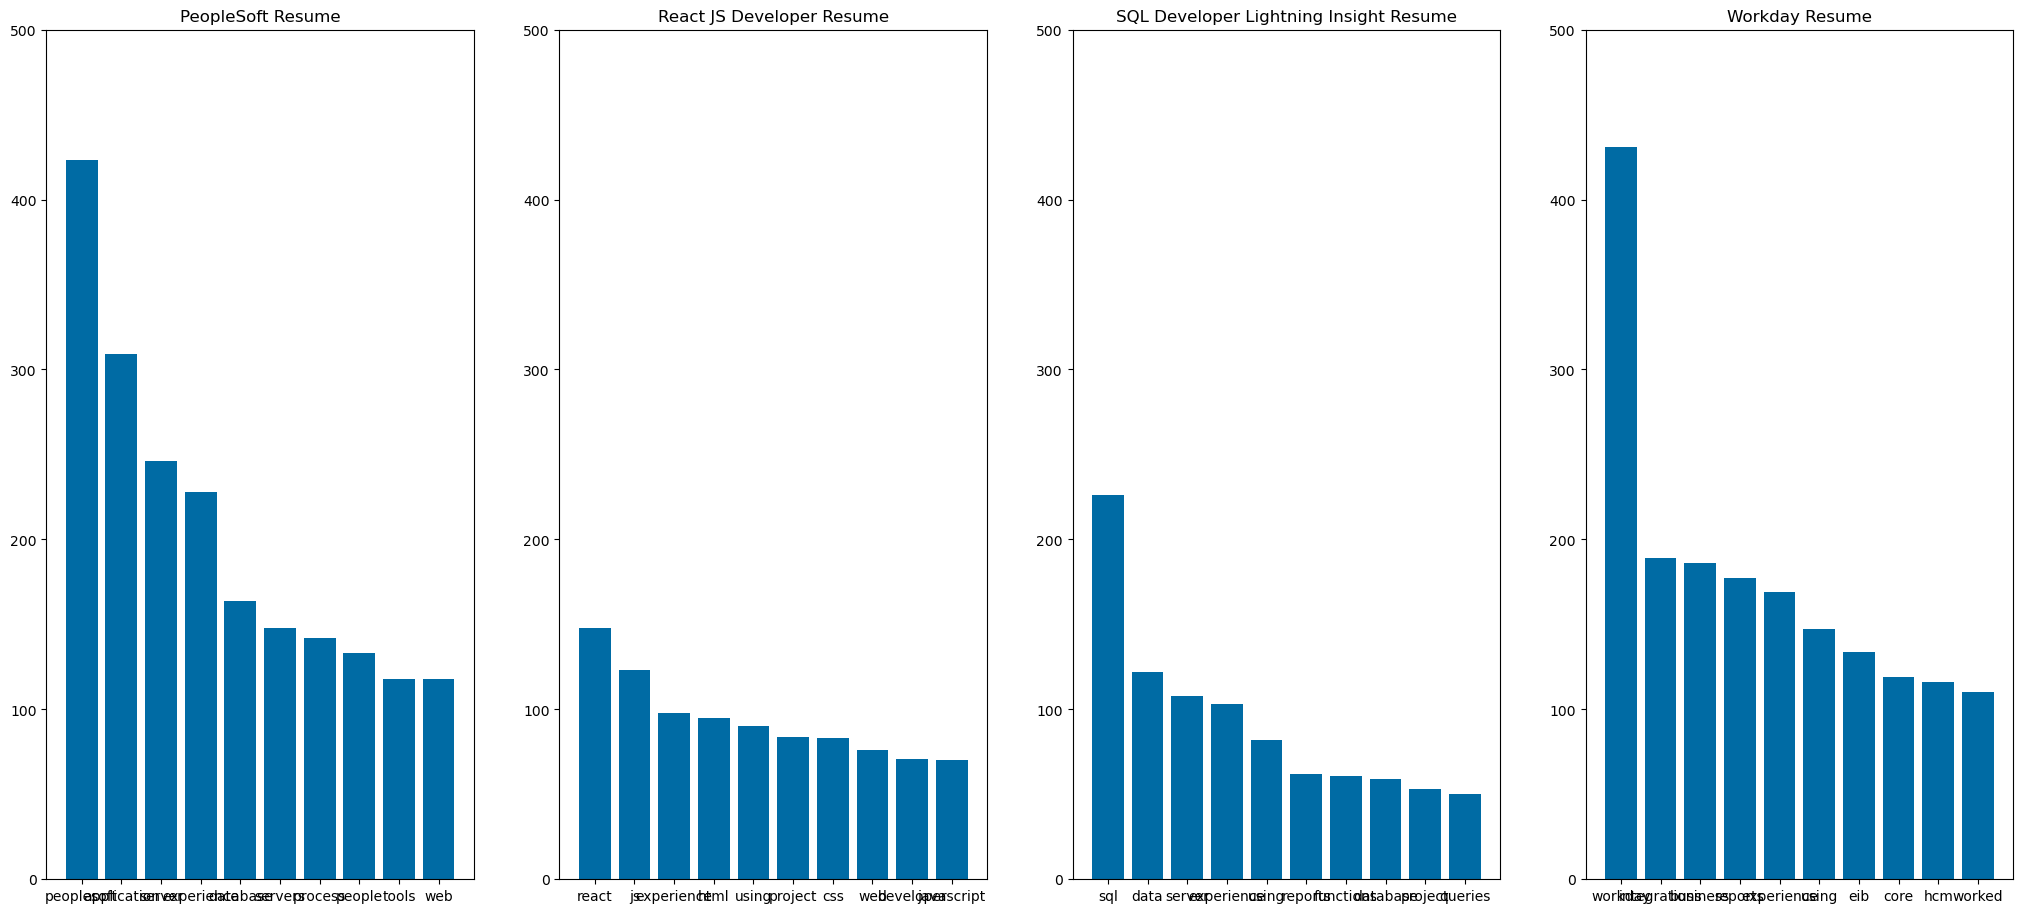

In [43]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [44]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [45]:
df

,Resumes,Category
0,name ravali p curriculum vitae specialization ...,1
1,susovan bag seeking challenging position field...,1
2,kanumuru deepak reddy career objective secure ...,1
3,haripriya battina experience ui developer reac...,1
4,kamalakar reddy linked www linkedin com kamala...,1
...,...,...
99,workday integration consultant name sri krishn...,3
100,srikanth workday hcm consultant seeking suitab...,3
101,workday hcm fcm name kumar role workday consul...,3
103,venkateswarlu b workday consultant professiona...,3


In [46]:
df.Category.value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

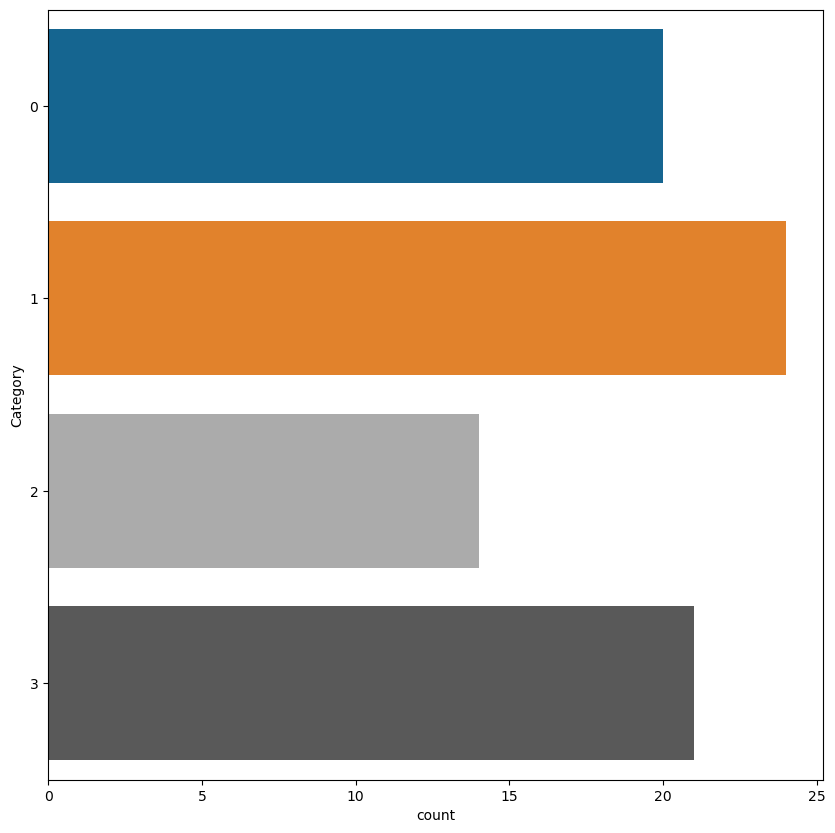

In [47]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="Category", data=df)

In [48]:
targetCounts = df['Category'].value_counts().reset_index()['Category']
targetLabels  = df['Category'].value_counts().reset_index()['index']

In [49]:
targetCounts

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [50]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

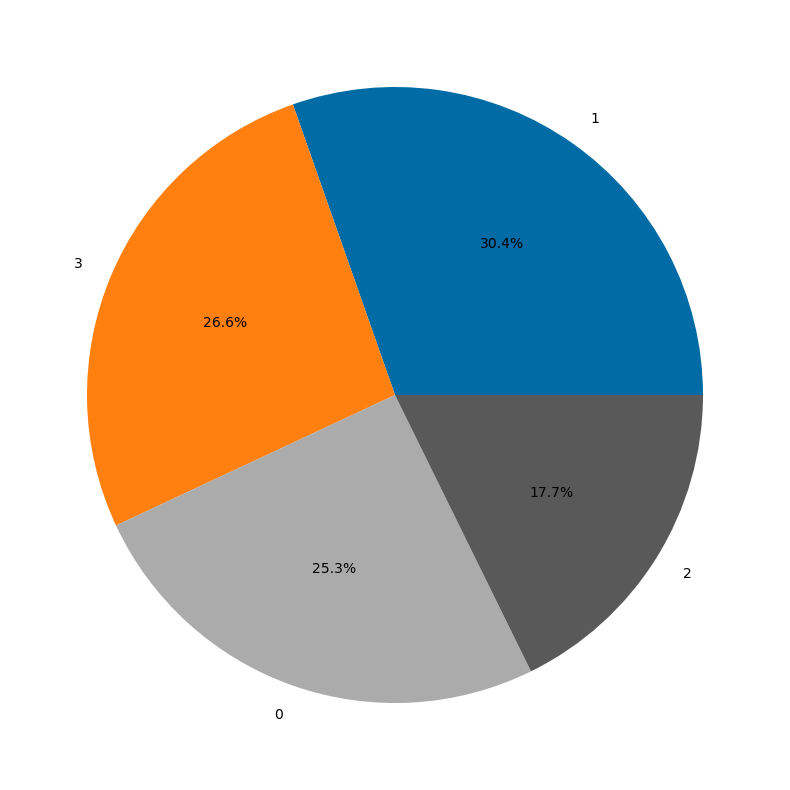

In [51]:
plt.figure(figsize=(10,10))
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%')
plt.show()

In [52]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==wordfreqdist[i]):
        same=same+1
    elif(lem_words[i]!=wordfreqdist[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 1832
Number of words not Lemmatized= 0


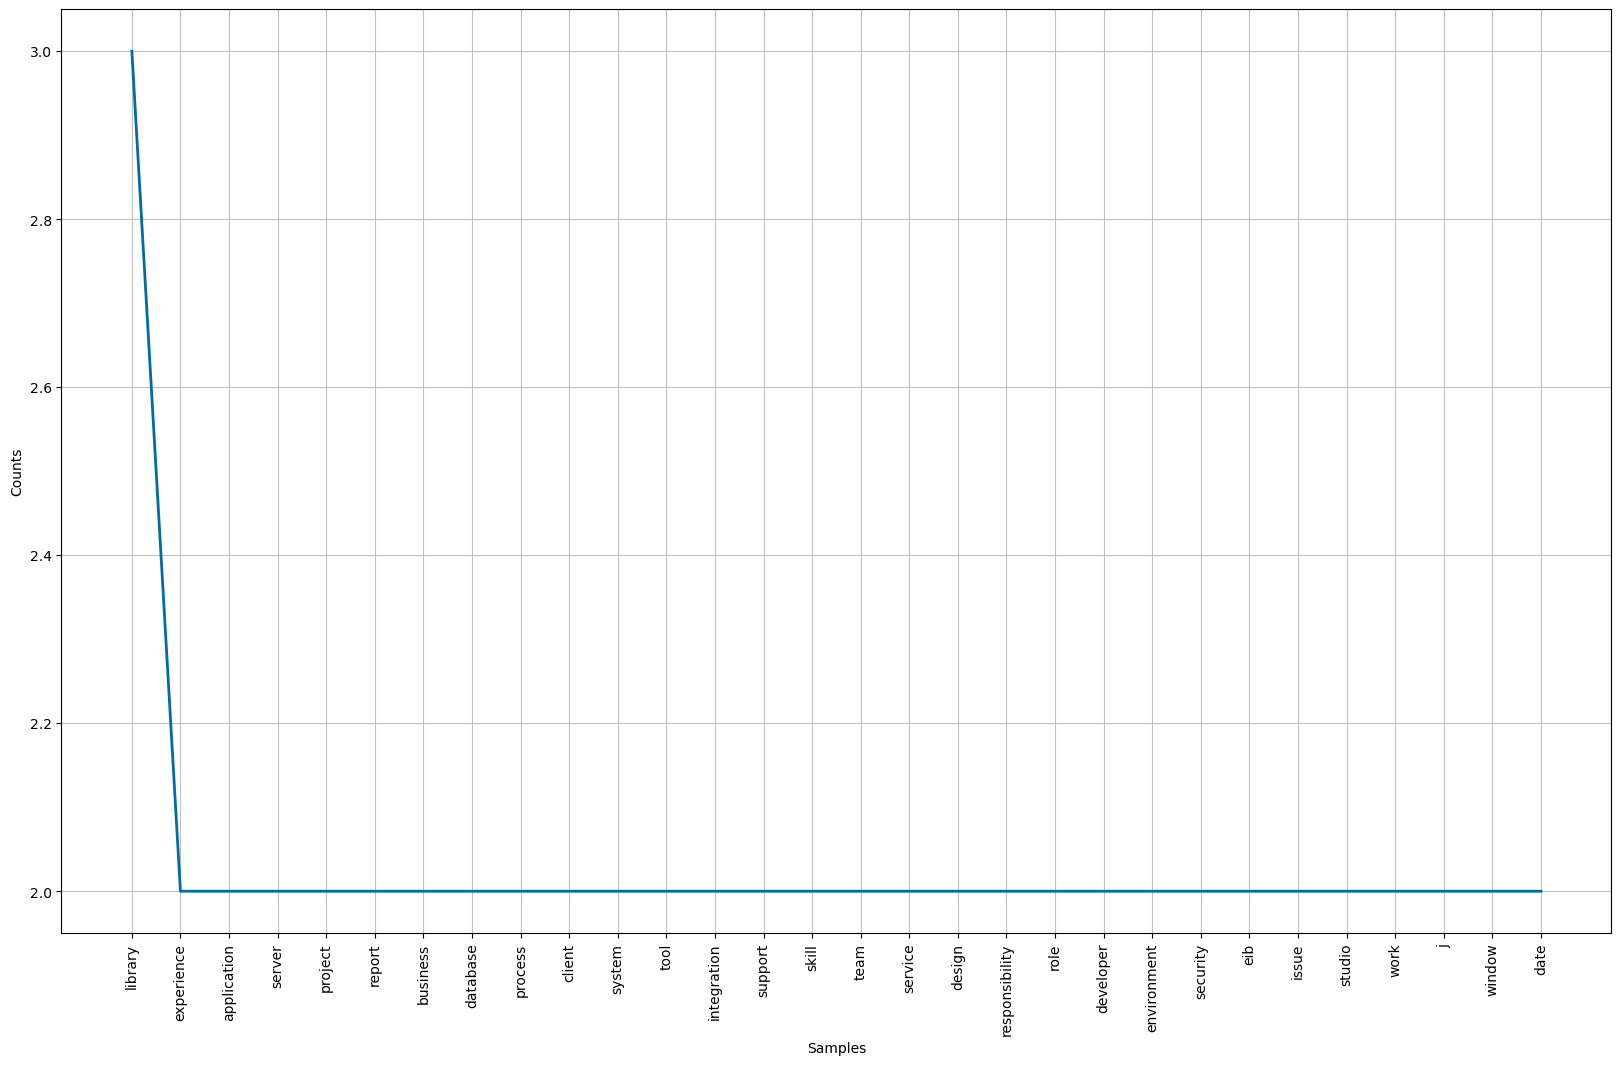

In [53]:
freq_dist = nltk.FreqDist(lem_words)
plt.subplots(figsize=(20,12))
freq_dist.plot(30)
plt.show()

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [55]:
requiredText = df['Resumes'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=42, test_size=0.33, shuffle = True, stratify=requiredTarget)

In [58]:
X_train.shape, X_test.shape

((52, 4460), (27, 4460))

In [59]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
lst=[DecisionTreeClassifier(max_depth=4),RandomForestClassifier(max_depth=3),AdaBoostClassifier(),GradientBoostingClassifier(),SVC(),KNeighborsClassifier(),XGBClassifier(),LGBMClassifier()]
for i in lst:
    print(i)
    print("  ")
    model=i.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("classification_report")
    print(classification_report(y_pred,y_test))
    print("confusion_matrix")
    print(confusion_matrix(y_pred,y_test))
    print("----------------------------THE-END-----------------------------")

DecisionTreeClassifier(max_depth=4)
  
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      1.00      0.86         6
           2       1.00      0.71      0.83         7
           3       1.00      1.00      1.00         7

    accuracy                           0.93        27
   macro avg       0.94      0.93      0.92        27
weighted avg       0.94      0.93      0.93        27

confusion_matrix
[[7 0 0 0]
 [0 6 0 0]
 [0 2 5 0]
 [0 0 0 7]]
----------------------------THE-END-----------------------------
RandomForestClassifier(max_depth=3)
  
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7

    accuracy                           1.00 

### All the models giving best F1 Score and Confusion matrix,Except AdaBoostClassifier.So,Im considering RandomForestClassifier

In [61]:
model=SVC(C=3, degree=3, gamma=1, kernel='rbf').fit(X_train,y_train)
y_pred=model.predict(X_test)

In [62]:
print("classification_report")
print(classification_report(y_pred,y_test))
print("confusion_matrix")
print(confusion_matrix(y_pred,y_test))

classification_report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27

confusion_matrix
[[6 0 0 0]
 [1 8 0 0]
 [0 0 5 0]
 [0 0 0 7]]


In [63]:
import os
os.chdir(r'C:\Users\harsh\Downloads\Resume_Classification_NLP')

In [64]:
import pickle
pickle.dump(model,open('trained_model.sav','wb')) #saving model with file name in write bytes mode
pickle.dump(word_vectorizer, open('tfidf_vectorizer.sav', 'wb')) #saving model with file name in write bytes mode